In [1]:
import mkvdecoder
import numpy as np

# Shakespeare in color 

In [4]:
with open('text_data/all_shakespere.txt', 'r') as myfile:
    shakespeare = ''
    for line in myfile:
        shakespeare+=line

In [5]:
import matplotlib.pyplot as plt

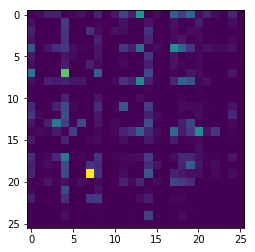

In [6]:
shakespeare_matrix = mkvdecoder.text_to_matrix(shakespeare, True)
plt.imshow(shakespeare_matrix)
plt.show()

#  fitness graph (main)

/Users/stefanopolla/git_repositories/Casimir-Markov-Chain-Decrypter-project/mkvdecoder.py:128: RuntimeWarning: invalid value encountered in double_scalars
  weight_for_transition=1/((fitness_value/fitness_value_try)+1)
/Users/stefanopolla/git_repositories/Casimir-Markov-Chain-Decrypter-project/mkvdecoder.py:128: RuntimeWarning: divide by zero encountered in double_scalars
  weight_for_transition=1/((fitness_value/fitness_value_try)+1)


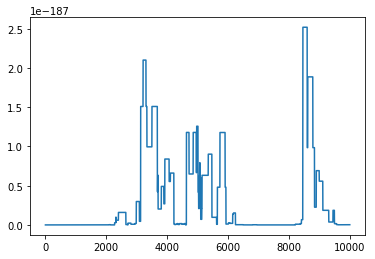

In [15]:
cipher = mkvdecoder.random_cipher()
inverted_true_cipher = mkvdecoder.random_cipher()
ref_matr = shakespeare_matrix
text = ('lets see if this text can be deciphered efficiently by our algorithm \n'
        +'the quick brown fox jumps over the lazy dog')
#text = shakespeare[1000:2000]
enc_text = mkvdecoder.decode_text(text, inverted_true_cipher)
enc_matr = mkvdecoder.text_to_matrix(enc_text, False)

fitness_vec=[]

for _ in range(10000):
    cipher = mkvdecoder.metropolis_step(ref_matr, enc_matr, cipher)
    fitness_vec+=[ mkvdecoder.fitness(ref_matr, mkvdecoder.decode_matrix(enc_matr,cipher) ) ]

plt.plot(fitness_vec)
plt.show()

In [15]:
cipher

array([25, 19, 16,  8, 13, 15, 23,  7, 14, 24,  5,  6, 12, 21,  2, 17, 20,
        9,  1, 18, 22,  3, 11,  4, 10,  0])

In [12]:
np.exp(
    np.trace(
        np.transpose(enc_matr) @ ( np.log(ref_matr+0.000000000000001) ) 
    ) 
)

0.0

In [13]:
np.trace(
        np.transpose(enc_matr) @ ( np.log(ref_matr+0.000000000000001) ) 
    )

-23527.798973259672

In [10]:
np.sum(ref_matr)

1.0

In [19]:
np.max(ref_matr)

0.03922736168454499